In [68]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb


In [69]:
pwd

'C:\\Users\\bhanu\\Data Science Daily\\IMDB Text Analytics'

In [70]:
from pandas import DataFrame
df = DataFrame.from_csv("labeledTrainData.tsv", sep="\t")

In [71]:
df.head(5)

,sentiment,review
id,,
5814_8,1,With all this stuff going down at the moment w...
2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
7759_3,0,The film starts with a manager (Nicholas Bell)...
3630_4,0,It must be assumed that those who praised this...
9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [72]:
df['id'] = df.index
df = df.reset_index(drop=True)


In [73]:
#df= df[['sentiment','review']]
df.shape

(25000, 3)

In [74]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''returns a tuple of the top n words in a sample and their accompanying counts, given a CountVectorizer object and text sample'''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.as_matrix())
    
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk import FreqDist
#from sklearn.feature_extraction.text import 



count_vectorizer = CountVectorizer(stop_words='english')
words,word_values = get_top_n_words(n_top_words= 15 , count_vectorizer=count_vectorizer,text_data=df['review'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words)
ax.set_title('Top Words') 

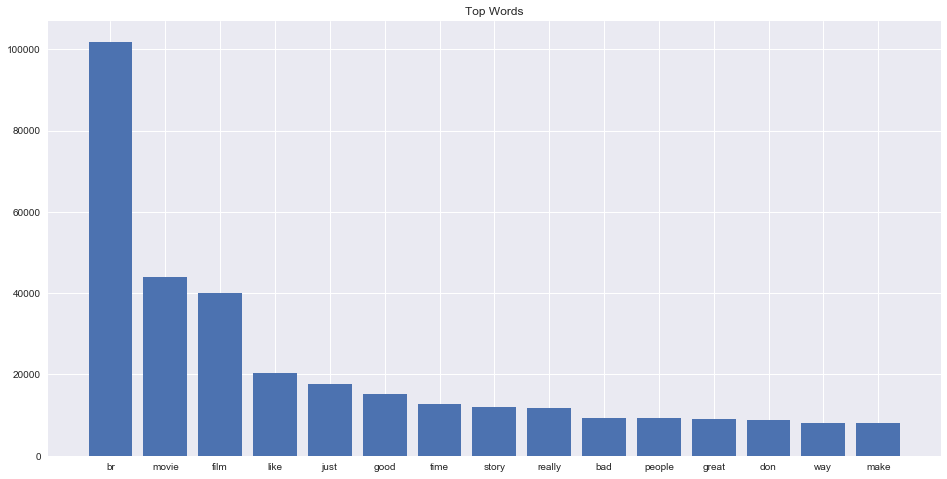

In [76]:
plt.show()

In [77]:
positive = df[df.sentiment==1]
negative = df[df.sentiment==0]



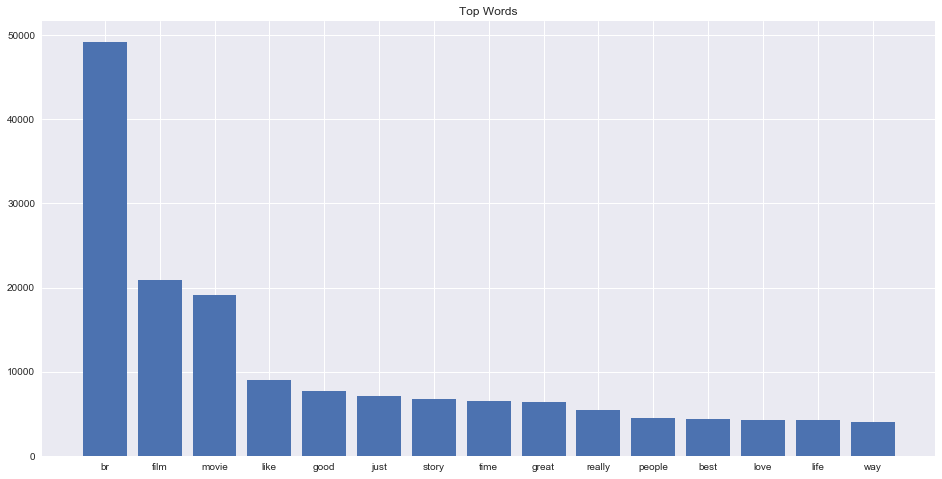

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk import FreqDist
#from sklearn.feature_extraction.text import 



count_vectorizer = CountVectorizer(stop_words='english')
words,word_values = get_top_n_words(n_top_words= 15 , count_vectorizer=count_vectorizer,text_data=positive['review'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words)
ax.set_title('Top Words') 
plt.show()

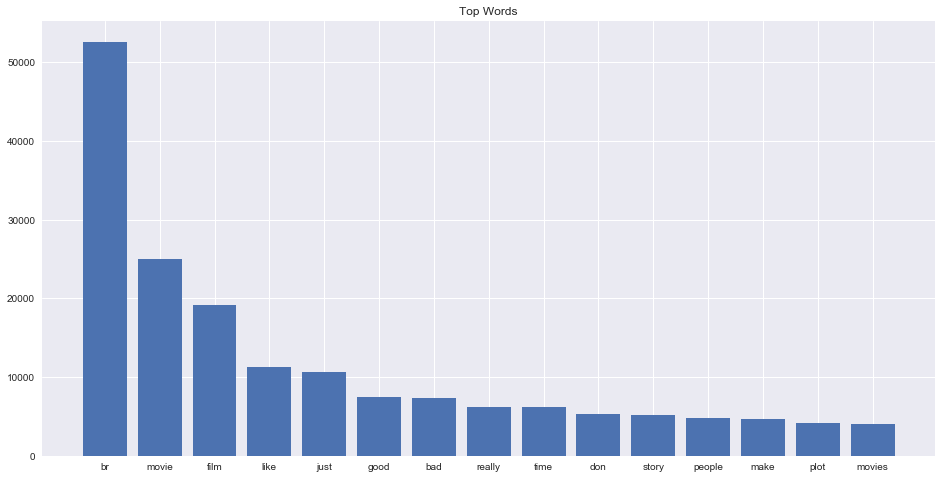

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk import FreqDist
#from sklearn.feature_extraction.text import 



count_vectorizer = CountVectorizer(stop_words='english')
words,word_values = get_top_n_words(n_top_words= 15 , count_vectorizer=count_vectorizer,text_data=negative['review'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words)
ax.set_title('Top Words') 
plt.show()

In [80]:
reindexed_data = df['review']
reindexed_data.index = df['id']
reindexed_data.head(2)

id
5814_8    With all this stuff going down at the moment w...
2381_9    \The Classic War of the Worlds\" by Timothy Hi...
Name: review, dtype: object

In [81]:
small_count_vectorizer = CountVectorizer(stop_words='english',max_features=30000)
small_text_sample = reindexed_data.sample(n=10000,random_state=0).as_matrix()

print('Headline before vectorization: ', small_text_sample[123])

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Headline after vectorization: \n', small_document_term_matrix[123])


Headline before vectorization:  What a fun movie experience! I was expecting a sappy kids movie and found that I enjoyed it more than my teens. Take a tissue, it's not sad, just 'moving' in parts. Finally, its a 'feel good' flick for the whole family. Note: It's 2+ hours, so consider leaving the littlest 'squirmers' home for this one. AP
Headline after vectorization: 
   (0, 1428)	1
  (0, 27092)	1
  (0, 26620)	1
  (0, 5809)	1
  (0, 13112)	1
  (0, 10115)	1
  (0, 19427)	1
  (0, 8977)	1
  (0, 12931)	1
  (0, 22979)	1
  (0, 15347)	1
  (0, 9523)	1
  (0, 9791)	1
  (0, 17659)	1
  (0, 9957)	1
  (0, 9513)	1
  (0, 10302)	1
  (0, 23141)	1
  (0, 18398)	1
  (0, 14665)	1
  (0, 10848)	1
  (0, 14835)	1
  (0, 17655)	2
  (0, 11529)	1


In [82]:
n_topics = 10

In [83]:
from sklearn.decomposition import TruncatedSVD

lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [84]:
def get_keys(topic_matrix):
    '''returns an integer list of predicted topic categories for a given topic matrix'''
    keys = []
    for i in range(topic_matrix.shape[0]):
        keys.append(topic_matrix[i].argmax())
    return keys

def keys_to_counts(keys):
    '''returns a tuple of topic categories and their accompanying magnitudes for a given list of keys'''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [85]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [91]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''returns a list of n_topic strings, where each string contains the n most common 
        words in a predicted category, in order'''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [92]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i), top_n_words_lsa[i])

AttributeError: 'int' object has no attribute 'toarray'

In [88]:
small_document_term_matrix[1].toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [97]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_topics==n_topics, learning_method='online', random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

TypeError: an integer is required